# 1. Background Problem

Dataset  : ml_dataset from BigQuery

Objective : Data ini merupakan data mining yang berasal dari Google BigQuery, dataset ini berisi tentang credit card. [link](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=zaky-ramdhani&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default) Pada dataset yang digunakan ini saya ingin membuat sebuah model untuk memprediksi pembayaran bulan depan.

# 2. Query SQL

Mengambil dataset dari BigQuery menggunakan Google Colab

In [ ]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "zaky-ramdhani"
client = bigquery.Client(project=project_id)

In [ ]:
df = client.query('''
SELECT
  limit_balance,
  CAST(sex AS INT64) AS sex,
  CAST(education_level AS INT64) AS education_level,
  CAST(marital_status AS INT64) AS marital_status,
  age,
  pay_0,
  pay_2,
  pay_3,
  pay_4,
  CAST(pay_5 AS FLOAT64) AS pay_5,
  CAST(pay_6 AS FLOAT64) AS pay_6,
  bill_amt_1,
  bill_amt_2,
  bill_amt_3,
  bill_amt_4,
  bill_amt_5,
  bill_amt_6,
  pay_amt_1,
  pay_amt_2,
  pay_amt_3,
  pay_amt_4,
  pay_amt_5,
  pay_amt_6,
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM
  `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT
  15968; 
''').to_dataframe()
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


Data ini memiliki (limit = 8*1996 = 15968)ternyata jumlah keseluruhan 2965 baris entry data dan 24 kolom terpilih. Berikut beberapa daftar kolom dan penjelasannya :
* `limit_balance` : jumlah batas pemakaian yang diberikan credit card setiap bulan
* `sex` : jenis kelamin (1=male, 2=female)
* `education_level` : tingkat pendidikan(1=lulus sekolah SMA, 2=kuliah, 3=SMA, 4=lain - lain, 5 & 6=tidak diketahui)
* `marital_status` : status pernikahan (1=menikah, 2=lajang, 3=lain - lain)
* `age` : usia
* `pay_0 sampai pay_5` : pembayaran (-1=bayar sewajarnya. 1=telat bayar 1 bulan, 2= telat bayar 2 bulan, 3= telat bayrar 3 bulan dan seterusnya ) 
* `bill_amt_1 sampai bill_amt_6` : jumlah tagihan setiap bulan
* `pay_amt_1 sampai pay_amt_6` : jumlah pembayaran berdasarkan jumlah tagihan
* `default_payment_next_month` : pembayaran bulan depan (1=iya, 0=tidak)

In [ ]:
df.to_csv('P1G5_Set_1_zaky_ramdhani.csv')
print("Data Berhasil Disimpan")

Data Berhasil Disimpan


# 3. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore")

#Untuk Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTENC

#Untuk Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# 4. Data Loading

In [2]:
# meload csv dengan variabel 
data = pd.read_csv('P1G5_Set_1_zaky_ramdhani.csv')

In [3]:
# menampilkan 10 baris data dari atas dan dengan posisi transpose
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
limit_balance,80000.0,200000.0,20000.0,260000.0,150000.0,300000.0,130000.0,200000.0,500000.0,230000.0
sex,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
education_level,6.0,4.0,6.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0
marital_status,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
age,54.0,49.0,22.0,33.0,32.0,32.0,45.0,58.0,39.0,48.0
pay_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pay_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pay_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pay_4,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# menampilkan 10 baris data dari bawah dan menampilkan seluruh kolom yang tadinya tidak terlihat
pd.set_option('display.max_columns', None)
data.tail(10)

,Unnamed: 0,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,12878.0,7702.0,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-100.0,100.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,96.0,780.0,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [5]:
# menampilkan nama - nama kolom
data.columns

Index(['Unnamed: 0', 'limit_balance', 'sex', 'education_level',
       'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4',
       'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3',
       'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [6]:
# menghapus kolom anomali 
data = data.drop(['Unnamed: 0'],axis=1)

In [7]:
# menampilkan info seputar data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [8]:
# menghitung masing - masing kolom
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [9]:
# mencari jumlah baris yang duplikat
data.duplicated().sum()

1

In [10]:
# menghapus jumlah baris yang duplikat
data = data.drop_duplicates()

In [11]:
# menampilkan jumlah baris dan kolom
data.shape

(2964, 24)

In [12]:
# mencari jumlah baris yang bernilai Nan
data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [13]:
# duplikasi data asli agar tidak berubah saat menghapus atau mengganti nama tau isi kolom
new_data = data.copy()

In [14]:
# mengganti nama - nama kolom agar lebih mudah
new_data.rename(columns = {'limit_balance' : 'lb', 'education_level' : 'el', 'pay_0' : 'pay_1',
       'marital_status' : 'ms', 'bill_amt_1' : 'ba1', 'bill_amt_2' : 'ba2', 'bill_amt_3' : 'ba3', 'bill_amt_4' : 'ba4',
       'bill_amt_5' : 'ba5', 'bill_amt_6' : 'ba6', 'pay_amt_1' : 'pa1', 'pay_amt_2' : 'pa2', 'pay_amt_3' : 'pa3',
       'pay_amt_4' : 'pa4', 'pay_amt_5' : 'pa5', 'pay_amt_6' : 'pa6', 'default_payment_next_month' : 'pnm'}, inplace = True)

In [15]:
# menampilkan data baru yang sudah diubah
new_data

,lb,sex,el,ms,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,ba1,ba2,ba3,ba4,ba5,ba6,pa1,pa2,pa3,pa4,pa5,pa6,pnm
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


# 5. Exploratory Data Analysis (EDA)

## Apakah ada perbedaan yang signifikan antara batas pemakaian(limit_balance) kartu kredit untuk pria dan wanita?

Text(0.5, 1.0, 'Distribusi Limit Balance Berdasarkan Jenis Kelamin')

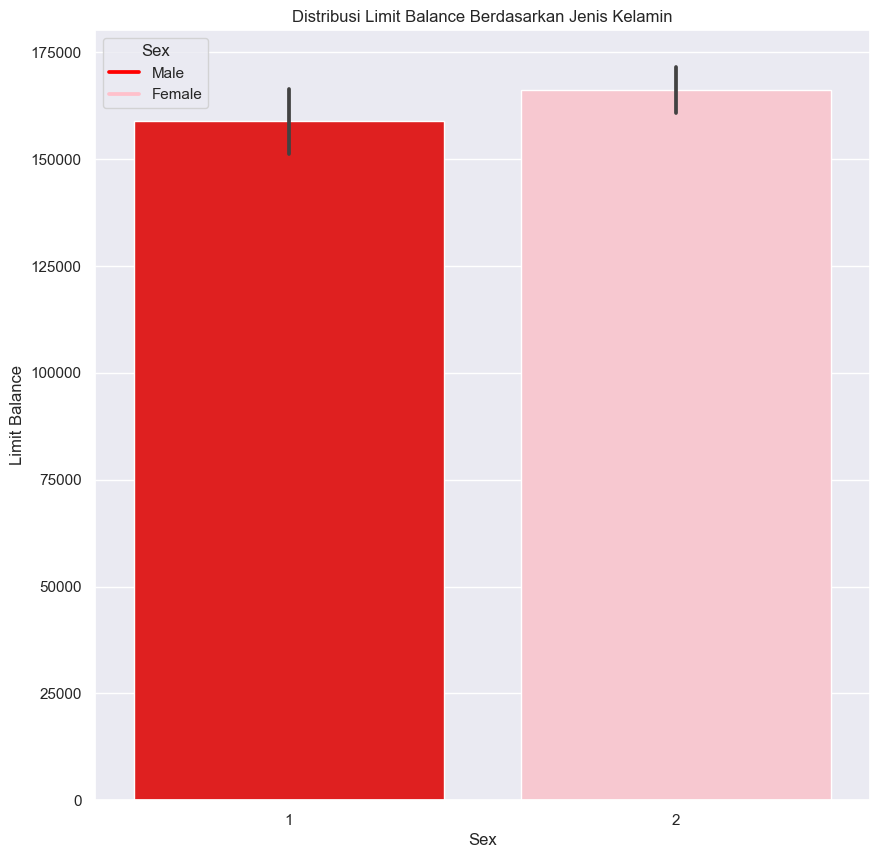

In [16]:
# Menampilkan Visualisasi dengan barplot
sns.set(rc={'figure.figsize':(10,10)}) #ukuran
cols = ['red','pink'] #warna
sns.barplot(data=new_data, x='sex', y='lb', palette= cols) #kolom yang digunakan
plt.xlabel('Sex')
plt.ylabel('Limit Balance')
legend = plt.legend(title='Sex', labels=['Male', 'Female'])
legend.legendHandles[0].set_color('red')
legend.legendHandles[1].set_color('pink')
plt.title('Distribusi Limit Balance Berdasarkan Jenis Kelamin')

In [17]:
print(new_data.groupby('sex').agg(mean_limit=('lb', 'mean')))

        mean_limit
sex               
1    158925.193465
2    166218.767351


*Kesimpulan*
* pada visualisasi dan perhitungan, tidak ada perbedaan yang signifikan antara male dan female terhadap limit_balance karena rata - rata male : 158.925$ dan female : 166.218$ sehingga batasan pemakaian credit card tidak pengaruh karena gender

## Apakah ada kecendrungan pembayaran bulan depan dengan jenis kelamin? Dan rata - rata di usia berapa orang yang akan membayar pada bulan depan?

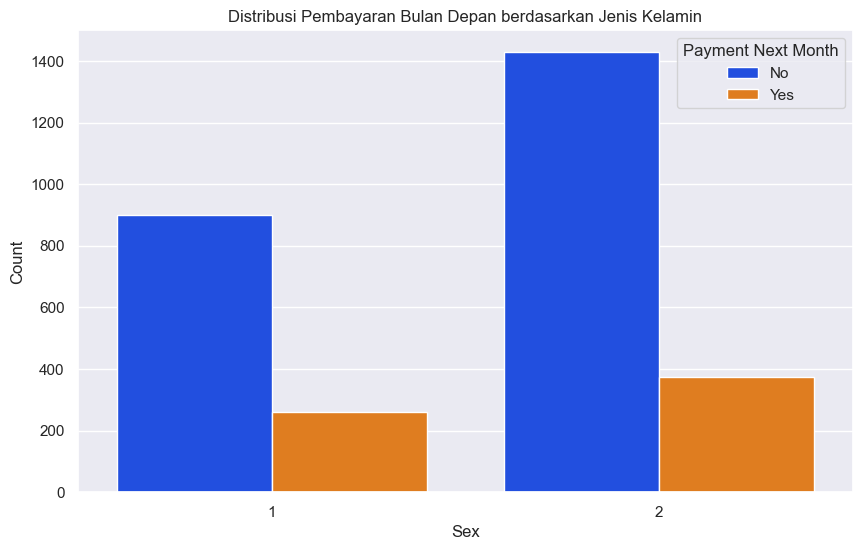

In [18]:
# Membuat countplot untuk default pembayaran bulan depan berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='sex', hue='pnm', palette='bright')
plt.title('Distribusi Pembayaran Bulan Depan berdasarkan Jenis Kelamin')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Payment Next Month', labels=['No', 'Yes'])

plt.show()


In [19]:
# Menghitung jumlah dan rata-rata jenis kelamin yang akan membayar pada bulan depan
pay_next_month = new_data[new_data['pnm'] == 1]

total_female = pay_next_month[pay_next_month['sex'] == 2]['sex'].count()
total_male = pay_next_month[pay_next_month['sex'] == 1]['sex'].count()

mean_age_female = pay_next_month[pay_next_month['sex'] == 2]['age'].mean()
mean_age_male = pay_next_month[pay_next_month['sex'] == 1]['age'].mean()

print("Jumlah wanita yang akan membayar pada bulan depan:", total_female)
print("Jumlah pria yang akan membayar pada bulan depan:", total_male)
print("Rata-rata usia wanita yang akan membayar pada bulan depan:", mean_age_female)
print("Rata-rata usia pria yang akan membayar pada bulan depan:", mean_age_male)


Jumlah wanita yang akan membayar pada bulan depan: 373
Jumlah pria yang akan membayar pada bulan depan: 262
Rata-rata usia wanita yang akan membayar pada bulan depan: 34.14745308310992
Rata-rata usia pria yang akan membayar pada bulan depan: 37.396946564885496


*Kesimpulan*
* Pada visualisasi dan perhitungan yang memungkinkan untuk membayar pada bulan depan yaitu female dengan rata - rata usia 34 tahun walau begitu lumayan banyak juga male yang membayar dengan usia rata - rata 37 tahun

## Bagaimana pola pembayaran berubah dari bulan ke bulan? Apakah ada tren pembayaran tertentu yang dapat diidentifikasi?

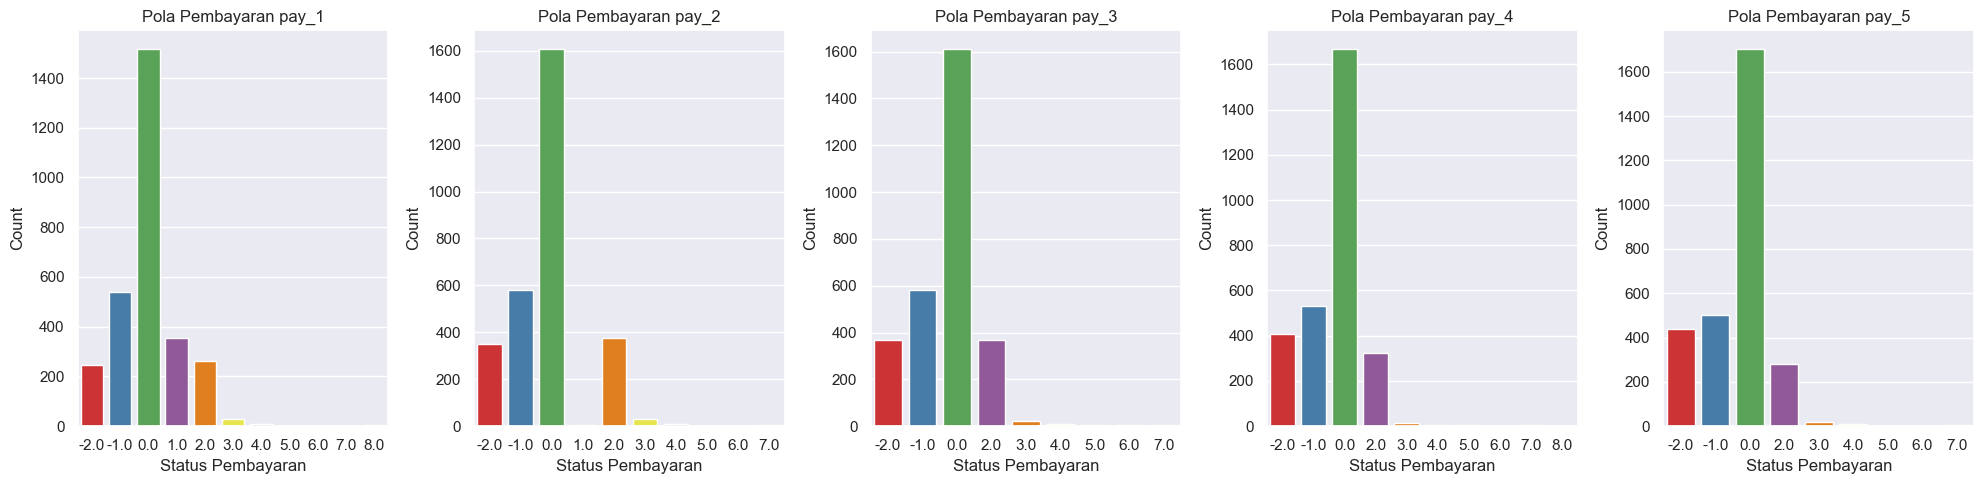

In [20]:
payment_columns = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5']

# Membuat subplots
plt.figure(figsize=(20, 5))
for i, col in enumerate(payment_columns, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=new_data, x=col, palette='Set1')
    plt.title(f'Pola Pembayaran {col}')
    plt.xlabel('Status Pembayaran')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


*Kesimpulan*
* pola pembayaran dalam data ini adalah beragam dan dinamis dari bulan ke bulan, dengan sebagian besar orang yang terlambat membayar pada bulan tertentu memperbaiki pembayaran pada bulan berikutnya. Namun, pola ini masih kompleks dan memerlukan analisis lebih lanjut untuk pemahaman yang lebih mendalam.

## Apakah ada hubungan antara jumlah tagihan dan jumlah pembayaran pada setiap bulan? Misalnya, apakah orang yang membayar lebih tinggi pada bulan tertentu cenderung memiliki tagihan yang lebih rendah pada bulan berikutnya?

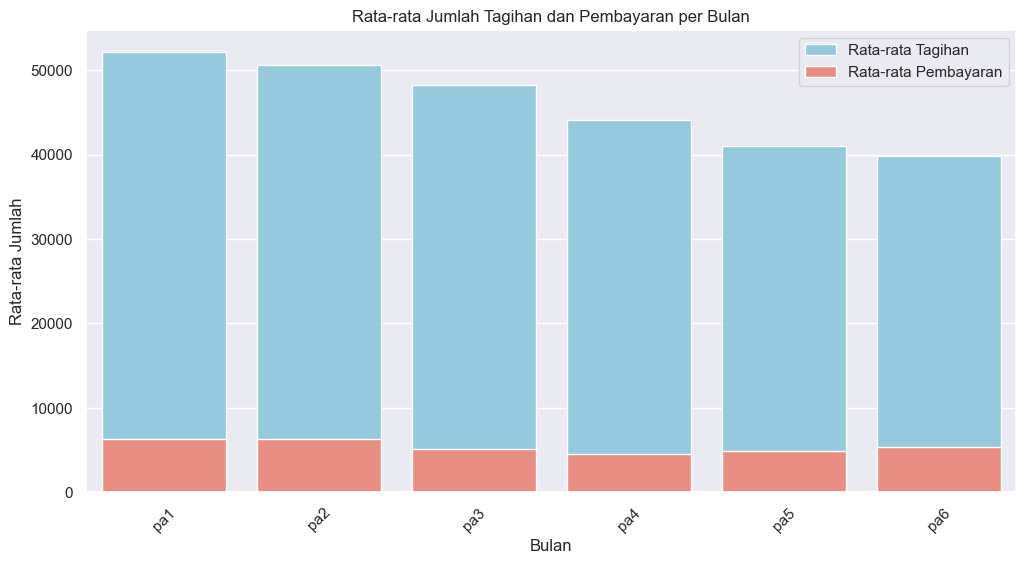

In [21]:
# Kolom-kolom yang ingin diplot
bill_columns = ['ba1', 'ba2', 'ba3', 'ba4', 'ba5', 'ba6']
payment_columns = ['pa1', 'pa2', 'pa3', 'pa4', 'pa5', 'pa6']

# Menghitung rata-rata jumlah tagihan dan pembayaran untuk setiap bulan
avg_bill_amounts = new_data[bill_columns].mean()
avg_payment_amounts = new_data[payment_columns].mean()

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_bill_amounts.index, y=avg_bill_amounts.values, color='skyblue', label='Rata-rata Tagihan')
sns.barplot(x=avg_payment_amounts.index, y=avg_payment_amounts.values, color='salmon', label='Rata-rata Pembayaran')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah')
plt.title('Rata-rata Jumlah Tagihan dan Pembayaran per Bulan')
plt.legend()
plt.xticks(rotation=45)

plt.show()


*Kesimpulannya*
* terdapat perbedaan yang signifikan antara jumlah tagihan dan jumlah pembayaran pada setiap bulan. Jumlah tagihan umumnya lebih tinggi pada bulan-bulan awal, tetapi jumlah pembayaran tidak selalu sama seperti pada plot pola pembayaran bulan 1 dan 2 tetap sama tetapi pada bulan 3 sampai 6 mengalami penurunan walau polanya sama.

# 6. Feature Engineering

### A. Feature Selection

In [22]:
#Memilih beberapa data yang kategori
pay_cor = new_data[['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pnm']]

<Axes: >

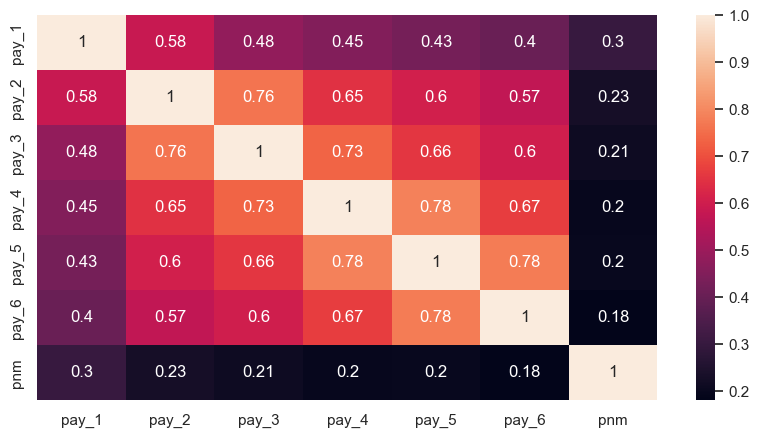

In [23]:
# visualisasi korelasi heatmap untuk kolom kategori dengan kendall tau
plt.figure(figsize=(10,5))
sns.heatmap(pay_cor.corr(method='kendall'),annot=True)

In [24]:
# memilih beberapa kolom numerik tagihan
bill_cor = new_data[['ba1','ba2', 'ba3', 'ba4', 'ba5', 'ba6', 'pnm']]

<Axes: >

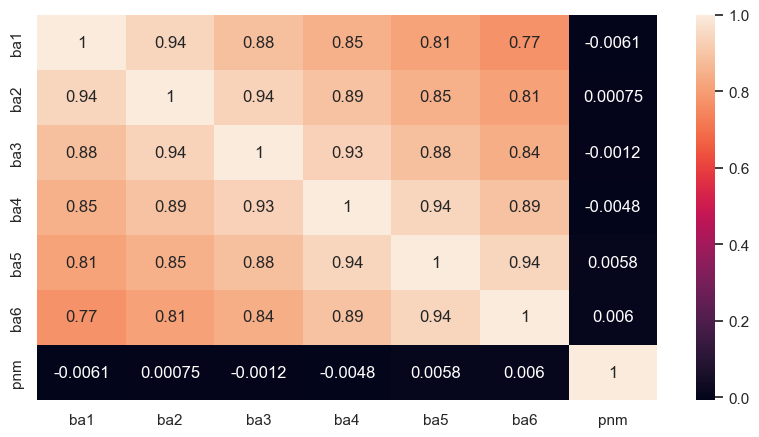

In [25]:
# visualisasi korelasi heatmap untuk kolom numerik dengan default 'pearson'
plt.figure(figsize=(10,5))
sns.heatmap(bill_cor.corr(method='pearson'),annot=True)

In [26]:
# memilih beberapa kolom numerik pembayaran
payment_cor = new_data[['lb', 'pa1','pa2', 'pa3', 'pa4', 'pa5', 'pa6', 'pnm']]

<Axes: >

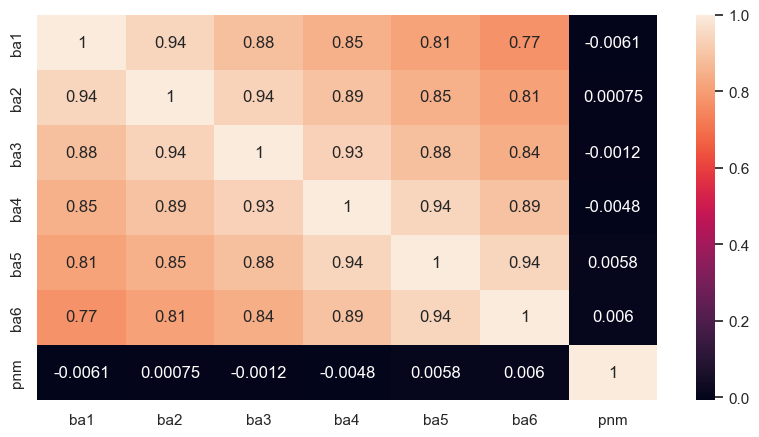

In [27]:
# visualisasi korelasi heatmap untuk kolom numerik dengan default 'pearson'
plt.figure(figsize=(10,5))
sns.heatmap(bill_cor.corr(method='pearson'),annot=True)

In [28]:
# memilih data beberapa tipe kategori
stat_cor = new_data[['sex', 'el','ms', 'age', 'pnm']]

<Axes: >

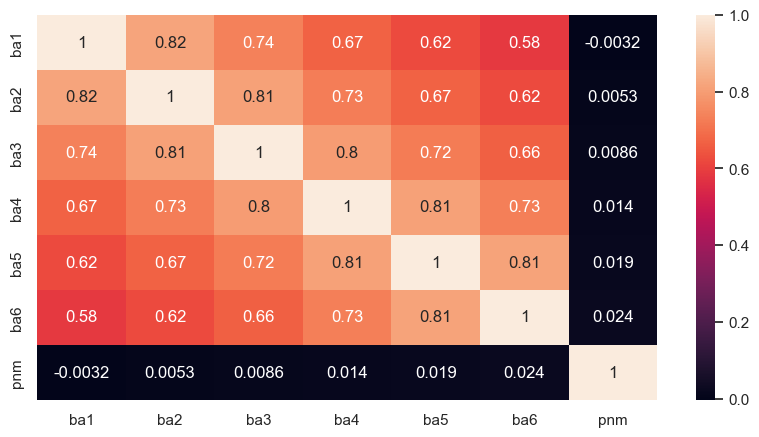

In [29]:
# visualisasi korelasi heatmap untuk kolom kategori dengan kendall tau
plt.figure(figsize=(10,5))
sns.heatmap(bill_cor.corr(method='kendall'),annot=True)

In [30]:
#membuat variabel baru sebagai feature selection setelah menduplikat data sebelumnya
fixdata = new_data.copy()
fixdata = fixdata[['lb','pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6','pnm']]

In [31]:
# menampilkan data baru
fixdata

,lb,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pnm
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,150000.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2960,80000.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,50000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,450000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,50000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


### B. Cardinality

In [32]:
print('Number of categories in the variable Pay1 : {}'.format(len(fixdata.pay_1.unique())))
print('Number of categories in the variable Pay2 : {}'.format(len(fixdata.pay_2.unique())))
print('Number of categories in the variable Pay3 : {}'.format(len(fixdata.pay_3.unique())))
print('Number of categories in the variable Pay4 : {}'.format(len(fixdata.pay_4.unique())))
print('Number of categories in the variable Pay5 : {}'.format(len(fixdata.pay_5.unique())))
print('Number of categories in the variable Pay6 : {}'.format(len(fixdata.pay_6.unique())))

Number of categories in the variable Pay1 : 11
Number of categories in the variable Pay2 : 10
Number of categories in the variable Pay3 : 9
Number of categories in the variable Pay4 : 10
Number of categories in the variable Pay5 : 9
Number of categories in the variable Pay6 : 8


Hasil : cardinality pada kolom 'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6' paling tinggi 11 dan masih dalam batas normal menurut saya sehingga tidak perlu di handling

### C. Handling Outlier

In [33]:
#Splitting antara X fitur and y target

X = fixdata.drop(['pnm'], axis = 1)
y = fixdata['pnm']
y

0       1
1       0
2       1
3       0
4       0
       ..
2960    0
2961    1
2962    1
2963    0
2964    0
Name: pnm, Length: 2964, dtype: int64

In [34]:
#Splitting fitur dan target menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
X_train

Train size (2371, 7)
Test size (593, 7)


,lb,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
2853,150000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2744,80000.0,-1.0,2.0,2.0,-2.0,-2.0,-2.0
729,140000.0,0.0,0.0,0.0,0.0,0.0,0.0
583,200000.0,0.0,0.0,0.0,0.0,0.0,0.0
2883,80000.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...
658,300000.0,0.0,0.0,0.0,0.0,0.0,0.0
2451,150000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2490,120000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0
1576,300000.0,-1.0,-1.0,-1.0,0.0,0.0,-2.0


In [35]:
# cek skewness
print('Skewed kolom Limit Balance         : ', X_train['lb'].skew())
print('Skewed kolom Limit Balance         : ', X_test['lb'].skew())

Skewed kolom Limit Balance         :  0.9977138239151048
Skewed kolom Limit Balance         :  0.9876420293640485


In [36]:
# Dibawah merupakan fungsi untuk membuat Histogram dan Boxplot
def diagnostic_plots(df, variable):
    # Define ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Limit Balance Skewed


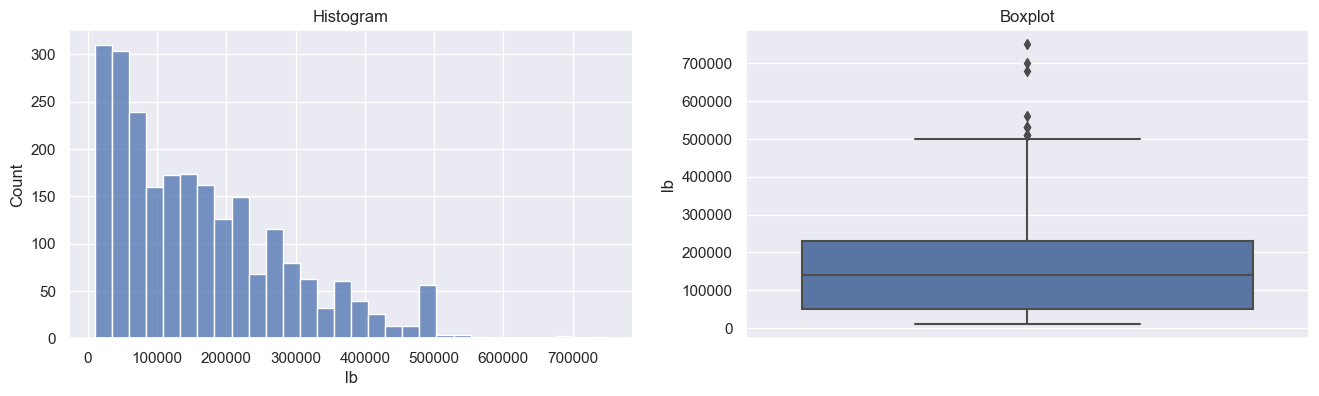

In [37]:
# Visualisasi untuk yang Skewed saja
print('Limit Balance Skewed')
diagnostic_plots(X_train, 'lb')

In [38]:
# membuat function hitung IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [39]:
# identifikasi outlier
upper_boundary_distance, lower_boundary_distance = find_skewed_boundaries(X_train, 'lb', 1.5)
print(upper_boundary_distance, lower_boundary_distance)

500000.0 -220000.0


In [40]:
print('Persentase Distance  : {}%'.format(len(X_train[X_train['lb'] > upper_boundary_distance])/len(X_train) * 100))

Persentase Distance  : 0.42176296921130324%


In [41]:
# caping outlier

winsoriser_distance = Winsorizer(capping_method='iqr', # IQR untuk distribusi skewed
                             tail='both', #capping 2 sisi outlier
                             fold=1.5, # rumus iqr
                             variables=['lb'])

X_train_capped = winsoriser_distance.fit_transform(X_train)
X_test_capped = winsoriser_distance.transform(X_test)

X_train Limit Balance - Sebelum Capping


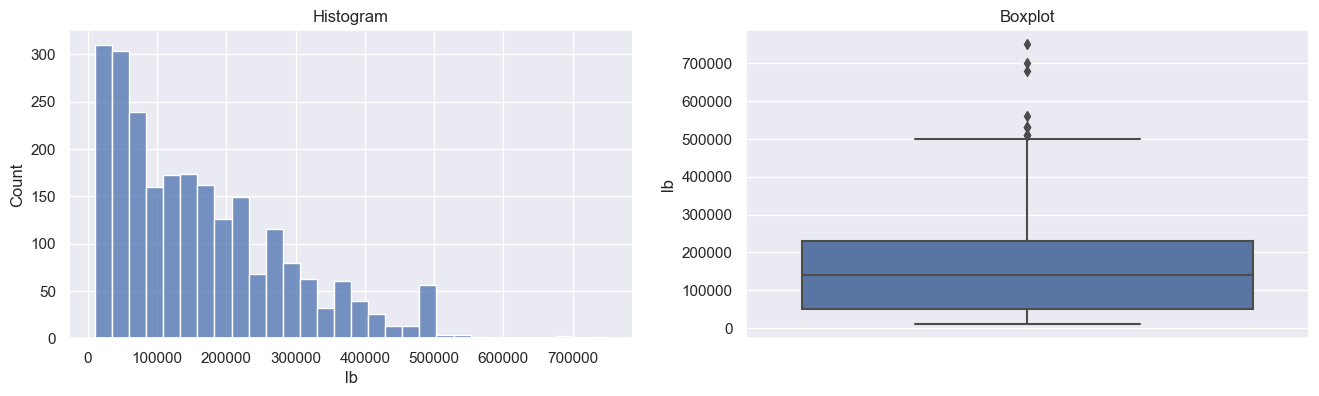


X_train Limit Balance - Setelah Capping


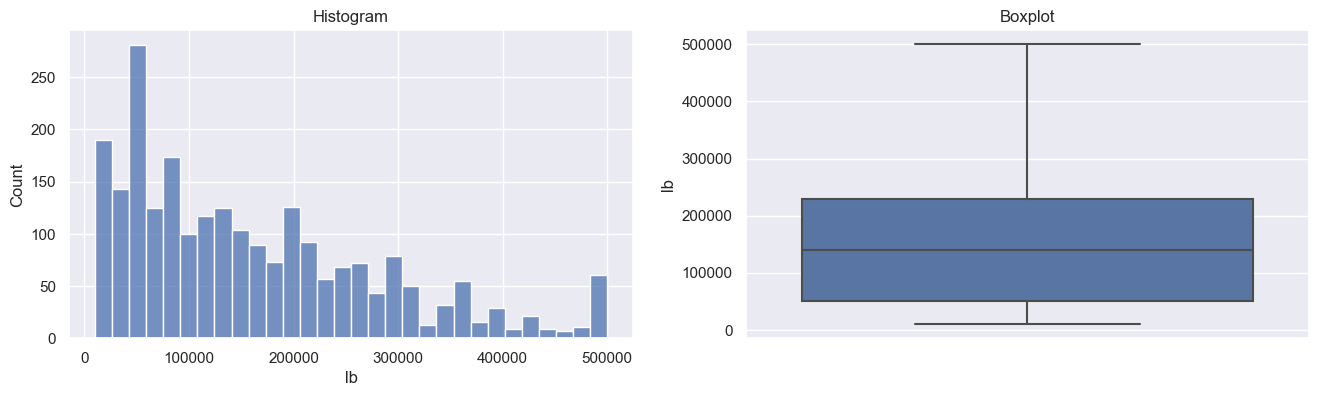


X_test Limit Balance - Sebelum Capping


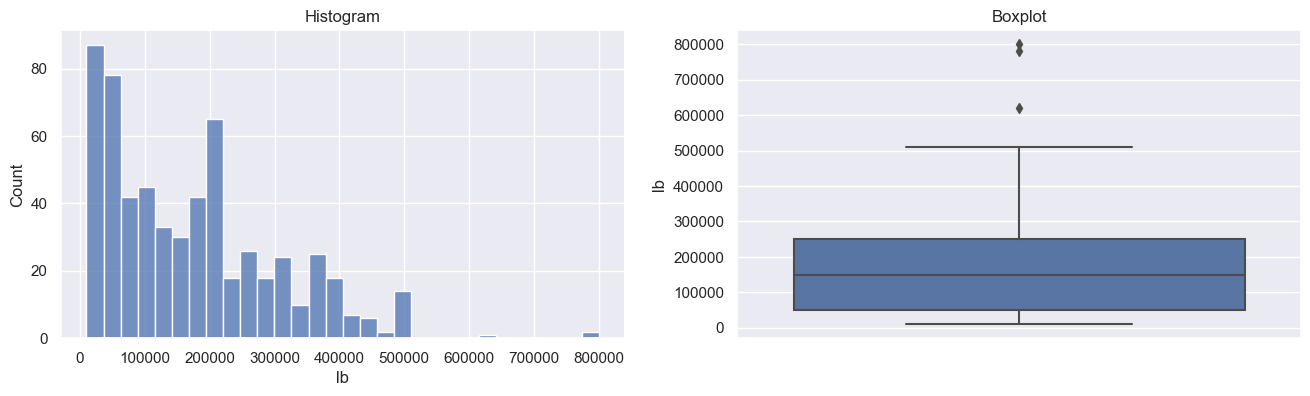


X_test Limit Balance - Setelah Capping


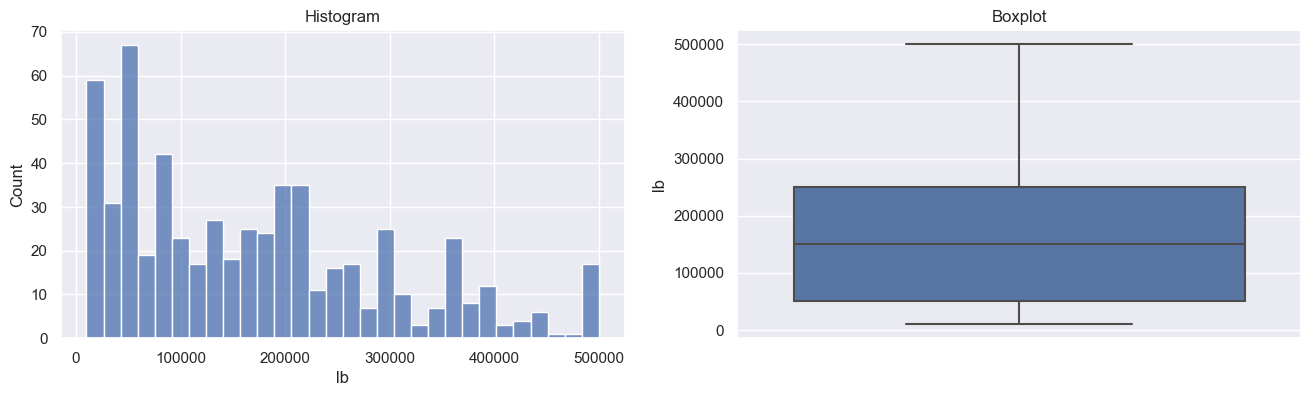

In [42]:
# cek distribusi sebelum dan sesudah dihapus outlier

print('X_train Limit Balance - Sebelum Capping')
diagnostic_plots(X_train, 'lb')

print('\nX_train Limit Balance - Setelah Capping')
diagnostic_plots(X_train_capped, 'lb')

print('\nX_test Limit Balance - Sebelum Capping')
diagnostic_plots(X_test, 'lb')

print('\nX_test Limit Balance - Setelah Capping')
diagnostic_plots(X_test_capped, 'lb')

In [43]:
# cek skewnes kembali
print(X_train_capped['lb'].skew())
print(X_test_capped['lb'].skew())

0.9301154004427633
0.7460265853875268


### D. Handling Missing Value

In [44]:
X_train_capped.isnull().sum()

lb       0
pay_1    0
pay_2    0
pay_3    0
pay_4    0
pay_5    0
pay_6    0
dtype: int64

In [45]:
X_test_capped.isnull().sum()

lb       0
pay_1    0
pay_2    0
pay_3    0
pay_4    0
pay_5    0
pay_6    0
dtype: int64

*Kesimpulan*
* setelah dilakukan pengecekan value yang bernilai NAN pada fitur train dan test ternyata data bersih sehingga tidak diperlukan untuk menghapus atau imputasi nilai NAN dengan mean dan median

### E. Feature Scaling

In [46]:
#melakukan scalling dengan menggunakan standard scaller
scaler = StandardScaler()
scaler.fit(X_train_capped[['lb']])

X_train_scaled = scaler.transform(X_train_capped[['lb']])
X_test_scaled = scaler.transform(X_test_capped[['lb']])
X_train_scaled

array([[-0.0886927 ],
       [-0.66303243],
       [-0.17074123],
       ...,
       [-0.3348383 ],
       [ 1.1420353 ],
       [-0.5809839 ]])

In [47]:
# memanggil kolom numerik train yang sudah di scaling
X_train_scaled

array([[-0.0886927 ],
       [-0.66303243],
       [-0.17074123],
       ...,
       [-0.3348383 ],
       [ 1.1420353 ],
       [-0.5809839 ]])

In [48]:
# memanggil kolom numerik test yang sudah di scaling
X_test_scaled

array([[-0.74508097],
       [ 1.1420353 ],
       [ 0.6497441 ],
       [-1.15532363],
       [ 1.96252063],
       [-0.66303243],
       [ 0.4035985 ],
       [-0.49893537],
       [ 1.96252063],
       [ 1.1420353 ],
       [ 0.73179263],
       [-0.49893537],
       [ 0.81384117],
       [-0.3348383 ],
       [ 1.05998677],
       [ 2.3727633 ],
       [-0.90917803],
       [-0.3348383 ],
       [ 1.1420353 ],
       [-0.5809839 ],
       [ 1.96252063],
       [ 1.8804721 ],
       [ 0.4035985 ],
       [-0.25278977],
       [ 0.32154997],
       [-1.15532363],
       [ 2.1266177 ],
       [ 1.05998677],
       [-0.0886927 ],
       [-0.00664417],
       [ 2.20866623],
       [-1.23737217],
       [-1.0732751 ],
       [-0.90917803],
       [ 1.6343265 ],
       [ 0.81384117],
       [ 0.4035985 ],
       [ 0.56769557],
       [ 0.81384117],
       [-0.90917803],
       [-0.66303243],
       [-0.66303243],
       [ 0.48564703],
       [-1.23737217],
       [-0.90917803],
       [-0

In [49]:
# membuat variabel baru untuk menampung kolom kategorical pada x train dan x test
X_train_cat=X_train_capped[['pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6']]
X_test_cat=X_test_capped[['pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6']]

In [50]:
# menggabungkan hasil dari x train. dan x test numerical dan x train kategorical yang sudah di data preprocessing
X_train_final = np.concatenate([X_train_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_cat], axis=1)

In [51]:
# memanggil x train final yang sudah di gabung
X_train_final

array([[-0.0886927 , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-0.66303243, -1.        ,  2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-0.17074123,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.3348383 , -1.        , -1.        , ..., -1.        ,
        -1.        , -2.        ],
       [ 1.1420353 , -1.        , -1.        , ...,  0.        ,
         0.        , -2.        ],
       [-0.5809839 , -1.        , -1.        , ..., -2.        ,
        -2.        , -2.        ]])

In [52]:
# memanggil x test final yang sudah di gabung
X_test_final

array([[-0.74508097,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1420353 , -1.        , -1.        , ..., -2.        ,
        -2.        , -2.        ],
       [ 0.6497441 ,  1.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ],
       ...,
       [ 1.1420353 , -1.        , -1.        , ..., -1.        ,
        -2.        , -2.        ],
       [ 0.32154997,  1.        ,  3.        , ...,  2.        ,
         2.        ,  2.        ],
       [-0.90917803,  2.        ,  3.        , ...,  2.        ,
         2.        ,  2.        ]])

In [53]:
# menyamakan index pada y train dan y test dengan fungsi loc
y_train = y_train.loc[X_train_capped.index]
y_test = y_test.loc[X_test_capped.index]

In [54]:
# cek distribusi imbalance
y_train.value_counts()

pnm
0    1864
1     507
Name: count, dtype: int64

In [55]:
# melakukan smotenc untuk membalancekan data
smotenc = SMOTENC([1,2,3,4,5,6], random_state = 100)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_final, y_train)
y_train_balanced.value_counts()

pnm
1    1864
0    1864
Name: count, dtype: int64

In [56]:
# membuat varibael baru data yang sudah di balance
X_train_finals= X_train_balanced
y_trains= y_train_balanced

# 7. Model Definition

## A. Logistic Regression

In [57]:
# mendefine model dengan logistic regression
logreg_model = LogisticRegression()

## B. KNN

In [58]:
# mendefine model dengan KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

## C. SVM

In [59]:
# mendefine model dengan SVM
svm_model = SVC()

# 8. Model Training

## A. Logistic Regression

In [60]:
# fit model logreg dengan train dan test
logreg_model.fit(X_train_finals,y_trains)

LogisticRegression()

In [61]:
# menampilkan model yang sudah di prediksi
y_train_predict_logreg = logreg_model.predict(X_train_finals)
y_test_predict_logreg = logreg_model.predict(X_test_final)
y_test_predict_logreg

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

## B. KNN

In [62]:
# fit model knn dengan train dan test
knn_model.fit(X_train_finals,y_trains)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# menampilkan model yang sudah di predict
y_train_predict_knn = knn_model.predict(X_train_finals)
y_test_predict_knn = knn_model.predict(X_test_final)
y_test_predict_knn

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

## C. SVM

In [64]:
# fit model svm dengan train dan test
svm_model.fit(X_train_finals, y_trains)

SVC()

In [65]:
# menampilkan model yang sudah di predict
y_train_predict_svm = svm_model.predict(X_train_finals)
y_test_predict_svm = svm_model.predict(X_test_final)
y_test_predict_svm

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# 9. Model Evaluation

## A. Logistic Regression

In [66]:
print(15*'='+'Classification Report Train Logistic Regression'+'='*15)
print('\n')
print(classification_report(y_trains, y_train_predict_logreg),)
print('\n')
print(15*'='+'Classification Report Test Logistic Report'+'='*15)
print('\n')
print(classification_report(y_test, y_test_predict_logreg),)

===============Classification Report Train Logistic Regression===============


              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1864
           1       0.67      0.68      0.68      1864

    accuracy                           0.68      3728
   macro avg       0.68      0.68      0.68      3728
weighted avg       0.68      0.68      0.68      3728



===============Classification Report Test Logistic Report===============


              precision    recall  f1-score   support

           0       0.90      0.68      0.77       465
           1       0.38      0.71      0.50       128

    accuracy                           0.69       593
   macro avg       0.64      0.70      0.64       593
weighted avg       0.78      0.69      0.71       593



dilihat dari nilai Logistic Regression f1_score memiliki nilai range train 0.68 dan test 0.50

### a. Cross Validation Model Logistic Regression

In [67]:
# Cross Validation using `cross_val_score`
f1_train_cross_val = cross_val_score(logreg_model,
                                     X_train_finals,
                                     y_trains,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.68892508 0.6864     0.65816733]
F1 Score - Mean - Cross Validation :  0.6778308040368385
F1 Score - Std - Cross Validation  :  0.013942337142252143
F1 Score - Range of Test-Set       :  0.6638884668945864 - 0.6917731411790906


F1 Score - Test Set   :  0.49591280653950953 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.68      0.77       465
           1       0.38      0.71      0.50       128

    accuracy                           0.69       593
   macro avg       0.64      0.70      0.64       593
weighted avg       0.78      0.69      0.71       593
 

Confusion Matrix      : 


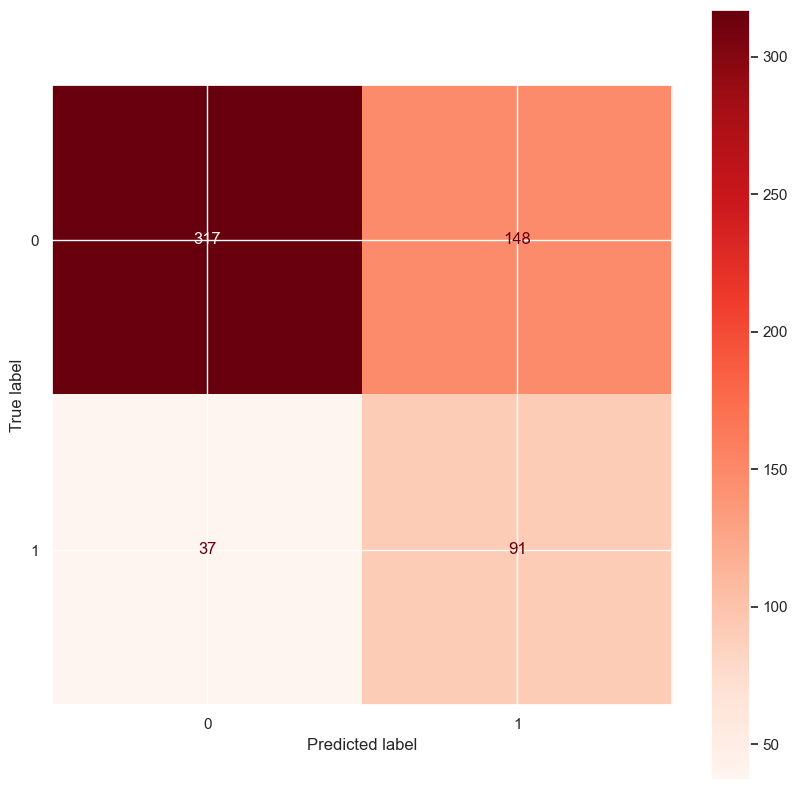

In [68]:
# Check Performance Model Test-Set
print('F1 Score - Test Set   : ', f1_score(y_test, y_test_predict_logreg), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_predict_logreg), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_model, X_test_final, y_test, cmap='Reds'))

In [69]:
# Save Classification Report into a Dictionary

all_reports_logreg = {}
def performance_report(all_reports, y_trains, y_train_predict_logreg, y_test, y_test_predict_logreg, name):
  score_reports = {
      'train - precision' : precision_score(y_trains, y_train_predict_logreg),
      'train - recall' : recall_score(y_trains, y_train_predict_logreg),
      'train - accuracy' : accuracy_score(y_trains, y_train_predict_logreg),
      'train - f1_score' : f1_score(y_trains, y_train_predict_logreg),
      'test - precision' : precision_score(y_test, y_test_predict_logreg),
      'test - recall' : recall_score(y_test, y_test_predict_logreg),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_logreg),
      'test - f1_score' : f1_score(y_test, y_test_predict_logreg),
  }
  all_reports_logreg[name] = score_reports
  return all_reports_logreg

all_reports_logreg = performance_report(all_reports_logreg, y_trains, y_train_predict_logreg, y_test, y_test_predict_logreg, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_logreg)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.688027
test - f1_score,0.495913
test - precision,0.380753
test - recall,0.710938
train - accuracy,0.675161
train - f1_score,0.676808
train - precision,0.673394
train - recall,0.680258


## B. KNN

In [70]:
print(15*'='+'Classification Report Train KNN'+'='*15)
print('\n')
print(classification_report(y_trains, y_train_predict_knn),)
print('\n')
print(15*'='+'Classification Report Test KNN'+'='*15)
print('\n')
print(classification_report(y_test, y_test_predict_knn),)

===============Classification Report Train KNN===============


              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1864
           1       0.88      0.76      0.82      1864

    accuracy                           0.83      3728
   macro avg       0.84      0.83      0.83      3728
weighted avg       0.84      0.83      0.83      3728



===============Classification Report Test KNN===============


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       465
           1       0.48      0.42      0.45       128

    accuracy                           0.78       593
   macro avg       0.66      0.65      0.65       593
weighted avg       0.77      0.78      0.77       593



dilihat dari nilai defult KNN f1_score memiliki nilai range train 0.82 dan test 0.45

### a. Cross Validation Model KNN

In [71]:
# Cross Validation using `cross_val_score`
f1_train_cross_val = cross_val_score(knn_model,
                                     X_train_finals,
                                     y_trains,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.66920877 0.77014419 0.75885329]
F1 Score - Mean - Cross Validation :  0.7327354162043852
F1 Score - Std - Cross Validation  :  0.04515600494467687
F1 Score - Range of Test-Set       :  0.6875794112597083 - 0.7778914211490621


F1 Score - Test Set   :  0.44813278008298757 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       465
           1       0.48      0.42      0.45       128

    accuracy                           0.78       593
   macro avg       0.66      0.65      0.65       593
weighted avg       0.77      0.78      0.77       593
 

Confusion Matrix      : 


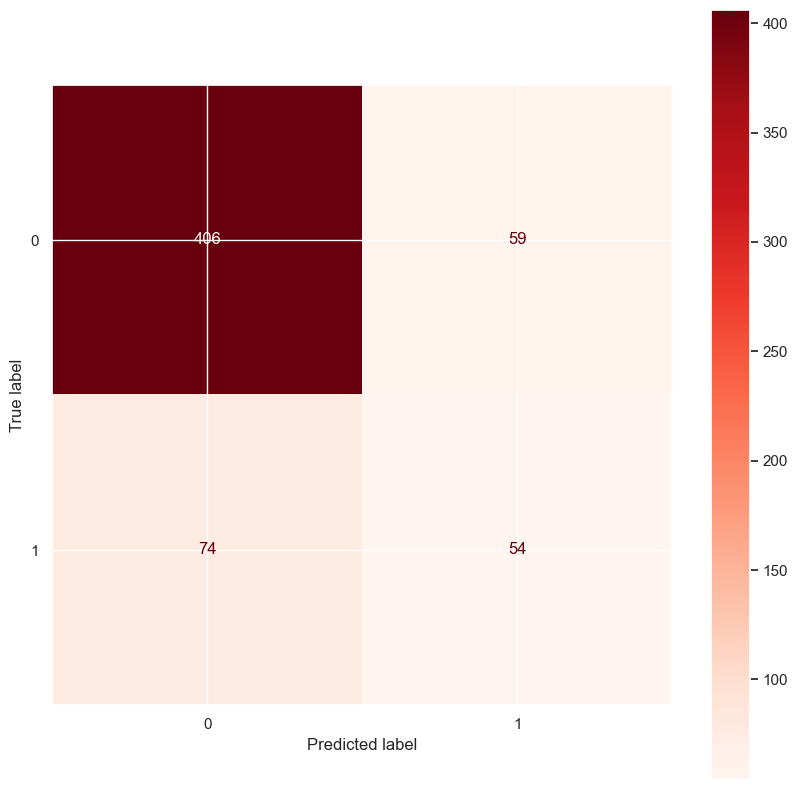

In [72]:
# Check Performance Model Test-Set
print('F1 Score - Test Set   : ', f1_score(y_test, y_test_predict_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_predict_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, X_test_final, y_test, cmap='Reds'))

In [73]:
# Save Classification Report into a Dictionary

all_reports_knn = {}
def performance_report(all_reports, y_trains, y_train_predict_knn, y_test, y_test_predict_knn, name):
  score_reports = {
      'train - precision' : precision_score(y_trains, y_train_predict_knn),
      'train - recall' : recall_score(y_trains, y_train_predict_knn),
      'train - accuracy' : accuracy_score(y_trains, y_train_predict_knn),
      'train - f1_score' : f1_score(y_trains, y_train_predict_knn),
      'test - precision' : precision_score(y_test, y_test_predict_knn),
      'test - recall' : recall_score(y_test, y_test_predict_knn),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_knn),
      'test - f1_score' : f1_score(y_test, y_test_predict_knn),
  }
  all_reports_knn[name] = score_reports
  return all_reports_knn

all_reports_knn = performance_report(all_reports_knn, y_trains, y_train_predict_knn, y_test, y_test_predict_knn, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_knn)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.775717
test - f1_score,0.448133
test - precision,0.477876
test - recall,0.421875
train - accuracy,0.830204
train - f1_score,0.817632
train - precision,0.883012
train - recall,0.761266


## C. SVM

In [74]:
print(15*'='+'Classification Report Train SVM'+'='*15)
print('\n')
print(classification_report(y_trains, y_train_predict_svm),)
print('\n')
print(15*'='+'Classification Report Test SVM'+'='*15)
print('\n')
print(classification_report(y_test, y_test_predict_svm),)

===============Classification Report Train SVM===============


              precision    recall  f1-score   support

           0       0.67      0.89      0.77      1864
           1       0.84      0.56      0.67      1864

    accuracy                           0.73      3728
   macro avg       0.75      0.73      0.72      3728
weighted avg       0.75      0.73      0.72      3728



===============Classification Report Test SVM===============


              precision    recall  f1-score   support

           0       0.87      0.91      0.89       465
           1       0.59      0.49      0.54       128

    accuracy                           0.82       593
   macro avg       0.73      0.70      0.71       593
weighted avg       0.81      0.82      0.81       593



dilihat dari nilai defult SVM f1_score memiliki nilai range train 0.67 dan test 0.54

### c. Cross Validation Model SVM

In [75]:
# Cross Validation using `cross_val_score`
f1_train_cross_val = cross_val_score(logreg_model,
                                     X_train_finals,
                                     y_trains,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.68892508 0.6864     0.65816733]
F1 Score - Mean - Cross Validation :  0.6778308040368385
F1 Score - Std - Cross Validation  :  0.013942337142252143
F1 Score - Range of Test-Set       :  0.6638884668945864 - 0.6917731411790906


F1 Score - Test Set   :  0.5384615384615385 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       465
           1       0.59      0.49      0.54       128

    accuracy                           0.82       593
   macro avg       0.73      0.70      0.71       593
weighted avg       0.81      0.82      0.81       593
 

Confusion Matrix      : 


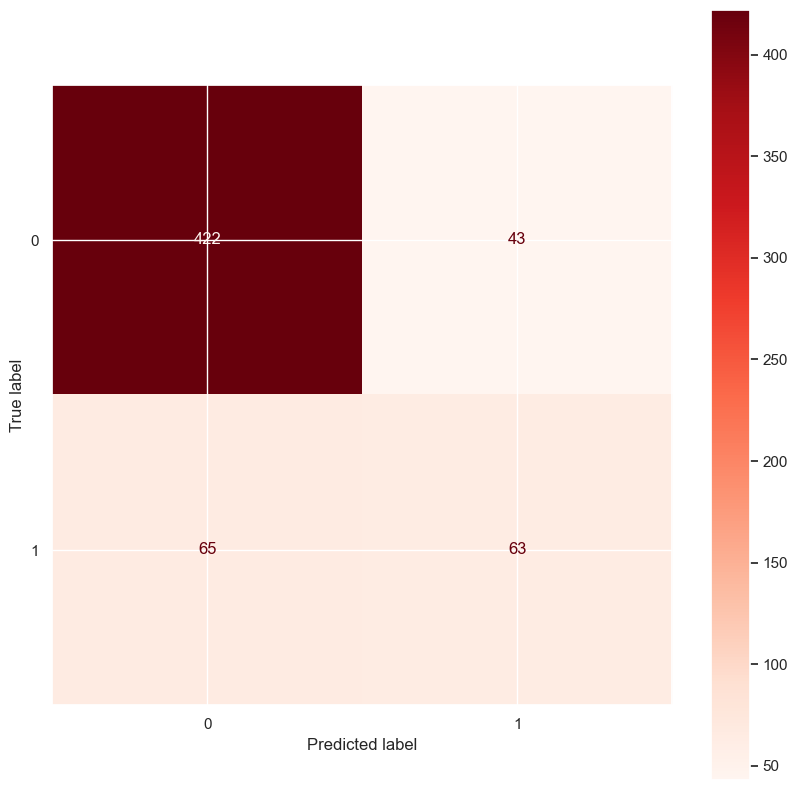

In [76]:
# Check Performance Model Test-Set
print('F1 Score - Test Set   : ', f1_score(y_test, y_test_predict_svm), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_predict_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_model, X_test_final, y_test, cmap='Reds'))

In [77]:
# Save Classification Report into a Dictionary

all_reports_svm = {}
def performance_report(all_reports, y_trains, y_train_predict_svm, y_test, y_test_predict_svm, name):
  score_reports = {
      'train - precision' : precision_score(y_trains, y_train_predict_svm),
      'train - recall' : recall_score(y_trains, y_train_predict_svm),
      'train - accuracy' : accuracy_score(y_trains, y_train_predict_svm),
      'train - f1_score' : f1_score(y_trains, y_train_predict_svm),
      'test - precision' : precision_score(y_test, y_test_predict_svm),
      'test - recall' : recall_score(y_test, y_test_predict_svm),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_svm),
      'test - f1_score' : f1_score(y_test, y_test_predict_svm),
  }
  all_reports_svm[name] = score_reports
  return all_reports_svm

all_reports_svm = performance_report(all_reports_svm, y_trains, y_train_predict_svm, y_test, y_test_predict_svm, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_svm)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.817875
test - f1_score,0.538462
test - precision,0.594340
test - recall,0.492188
train - accuracy,0.726931
train - f1_score,0.673089
train - precision,0.838400
train - recall,0.562232


## Hyperparameter Tunning Model KNN : Random Search

In [78]:
# Mendefine parameter untuk metode SVM 
#Saya memakai 2 parameter saja untuk mempersingkat waktu
random_search_params = {
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [79]:
#melakukan hyperparameter tunning dengan metode random search
rf_randomcv = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=100,
                                 cv=5,
                                 random_state=3,
                                 n_jobs=-1,
                                 scoring='f1')
rf_randomcv.fit(X_train_finals, y_trains)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=3, scoring='f1')

In [80]:
#memanggil parameter terbaik dalam random cv 
rf_randomcv.best_params_

{'weights': 'distance', 'p': 1}

In [81]:
rf_randomcv_best = rf_randomcv.best_estimator_

In [82]:
#melihat mean dan standard deviasi dari hyperparamter tuning random search
print(rf_randomcv.cv_results_['mean_test_score'].mean())
print(rf_randomcv.cv_results_['mean_test_score'].std())

0.7442105344770795
0.006749427181259431


F1 Score - Train Set  :  0.8893418753640069 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      1864
           1       0.97      0.82      0.89      1864

    accuracy                           0.90      3728
   macro avg       0.91      0.90      0.90      3728
weighted avg       0.91      0.90      0.90      3728
 



Confusion Matrix      : 


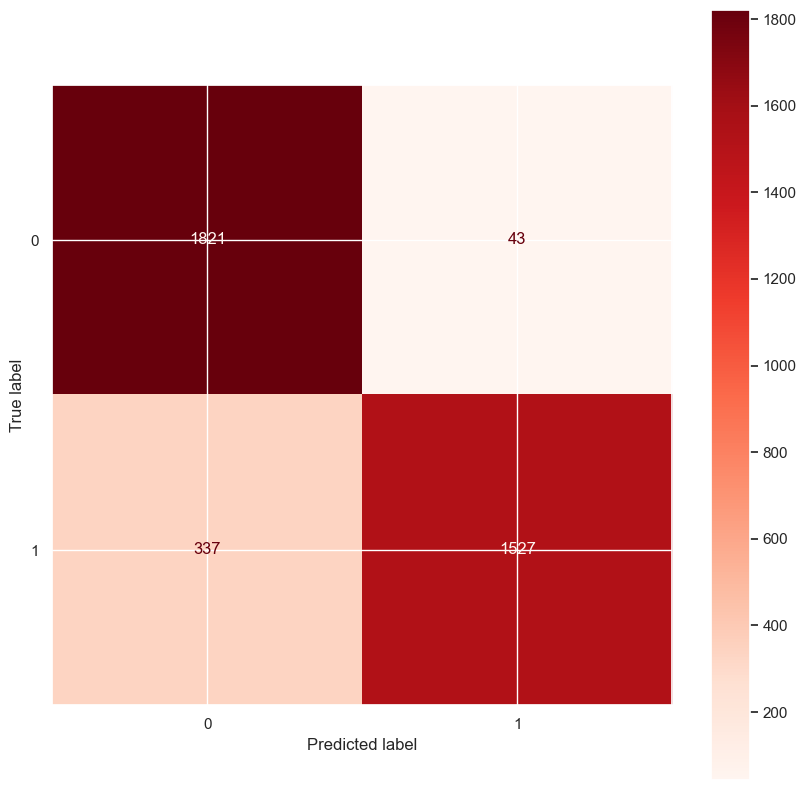

In [83]:
#melihat hasil data yang sudah di training dengan metode random search
y_pred_train_finals = rf_randomcv_best.predict(X_train_finals)

print('F1 Score - Train Set  : ', f1_score(y_trains, y_pred_train_finals), '\n')
print('Classification Report : \n', classification_report(y_trains, y_pred_train_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv, X_train_finals, y_trains, cmap='Reds'))

F1 Score - Train Set  :  0.48484848484848486 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       465
           1       0.54      0.44      0.48       128

    accuracy                           0.80       593
   macro avg       0.70      0.67      0.68       593
weighted avg       0.79      0.80      0.79       593
 

Confusion Matrix      : 


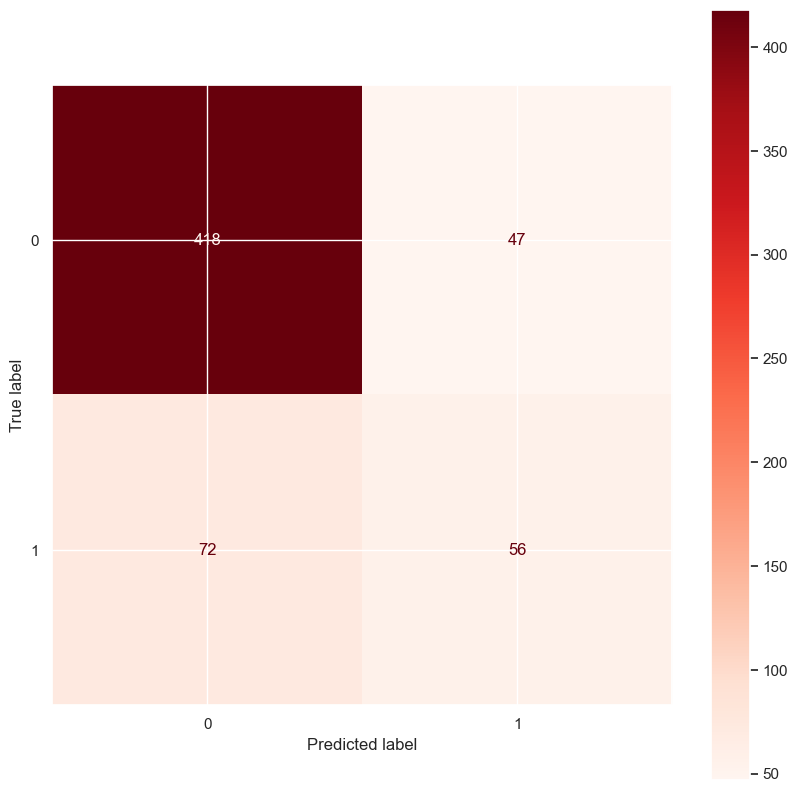

In [84]:
#menampilkan hasil data test dengan metode random search
y_pred_test_finals = rf_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_finals), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv, X_test_final, y_test, cmap='Reds'))

In [85]:
#menampilkan tabel perbandingan nilai dari f1 test yang default dan dengan metode random search
all_reports_knn = performance_report(all_reports_knn, y_trains, y_pred_train_finals, y_test, y_pred_test_finals, 'Random Search')
pd.DataFrame(all_reports_knn)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.838400,0.972611
train - recall,0.562232,0.819206
train - accuracy,0.726931,0.898069
train - f1_score,0.673089,0.889342
test - precision,0.594340,0.543689
test - recall,0.492188,0.437500
test - accuracy_score,0.817875,0.799325
test - f1_score,0.538462,0.484848


In [86]:
#mendefine fungsi KNN yang sudah di hyperparameter tuning dengan fungsi random search untuk di simpan dalam file pkl
model_knn = KNeighborsClassifier().fit(X_train_finals,y_trains)

# 10. Model Saving

In [87]:
# Model Saving

with open('scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_knn.pkl', 'wb') as file_2:
  pickle.dump(model_knn, file_2)

# Conceptual Problem

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

koefisien (atau nilai koefisien) yang digunakan untuk menggambarkan hubungan antara variabel independen (features) dan log-odds dari variabel dependen (target). Regresi logistik digunakan untuk memodelkan hubungan antara variabel independen kategorikal atau numerik dengan variabel dependen biner (dua kategori : 1 dan 0) atau multinomial (lebih dari dua kategori :-1, 0, 1, 2, 3, 4).

2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

Terdapat 3 kernels yang bisa digunakan pada SVM yaitu `Linear`, `Polynomial`, dan `RBF`. Kernels digunakan untuk mengukur kesamaan atau jarak antara dua titik dalam ruang fitur atau untuk mengubah data ke dimensi yang lebih tinggi. Mereka sangat berguna dalam berbagai tugas seperti klasifikasi, regresi, dan pengelompokan. `Kernel RBF` mengukur kesamaan antara dua vektor sebagai fungsi dari jarak mereka dalam ruang fitur. Kernel ini menghasilkan pemetaan ke ruang dimensi tak hingga, yang memungkinkan penanganan data yang sangat kompleks dan tidak linear.

3. Bagaimana cara memilih `K` yang optimal pada KNN ?

Memilih K yang optimal dengan split dataset menjadi train dan test dan melakukan percobaan pada tahap (model training) klasifikasi hingga mendapatkan score(precision, recall, f1 score) yang paling tinggi, setelahnya melakukan (model evaluation) dengan cross validation dan hyperparameter tunning sehingga mendapatkan performa yang baik

4. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

Accuracy: Merupakan rasio dari jumlah prediksi yang benar (positif dan negatif) dibandingkan dengan jumlah total sampel. Berguna ketika distribusi kelas seimbang. Namun, bisa menjadi bias jika kelas tidak seimbang.
Precision: Merupakan rasio dari jumlah prediksi positif yang benar dibandingkan dengan total prediksi positif. Berguna ketika penting untuk menghindari false positive.
Recall: Merupakan rasio dari jumlah prediksi positif yang benar dibandingkan dengan total jumlah sampel positif yang sebenarnya. Berguna ketika penting untuk menghindari false negative.
F1 Score: Merupakan ukuran yang mengkombinasikan precision dan recall. Berguna ketika Anda ingin mencari keseimbangan antara precision dan recall.

# Kesimpulan

- Memilih KNN model untuk dilakukan Hyperparameter tunning karena dari model Logistic Regression dan SVM yang di training, KNN memiliki classification report terbesar pada train yaitu 82% pada F1 Score

- Memilih F1 Score Sebagai Parameter Score:
memilih F1 score sebagai parameter penilaian model. F1 score adalah metrik yang menggabungkan presisi (precision) dan recall. Karena ingin meminimalkan jumlah false positive dan false negative. F1 score berguna ketika Anda ingin menghindari salah mengklasifikasikan data ke kelas yang salah.

- Hasil Standar Deviasi (STD) yang Mendekati 0 dan Berada di Bawah Mean:
model KNN dengan nilai standar deviasi (STD) mendekati 0 dan di bawah mean adalah model yang best fit. Ini menunjukkan bahwa model KNN memiliki konsistensi yang baik dalam menghasilkan hasil yang stabil dan tidak terlalu bervariasi. Model yang konsisten dapat dianggap sebagai model yang dapat diandalkan.

- Validasi Hasil Prediksi yang Kurang Baik (45%):
Meskipun model KNN konsisten, hasil prediksinya kurang memuaskan karena akurasi yang rendah, hanya sekitar 48%. Ini berarti model masih melakukan banyak kesalahan dalam memprediksi kelas yang benar, yang dapat berarti biaya yang tinggi dalam bisnis jika digunakan untuk pengambilan keputusan.

- Strategi Meningkatkan Jumlah User yang Bisa Bayar:
memberikan saran untuk meningkatkan jumlah pengguna yang dapat membayar dengan menyesuaikan jadwal penagihan. Penagihan dilakukan pada tanggal gajian, karena pada saat itu orang memiliki lebih banyak uang. Ini adalah saran yang baik karena dapat meningkatkan kemungkinan pembayaran tepat waktu dari pelanggan.